In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import datetime

In [97]:
df = pd.read_csv('../../datasets/summary/particles_inout.csv')
df['DATE'] = df['DATE'].apply(pd.to_datetime)

In [98]:
df.head()

,DATE,PM1,PM2.5,PM10,PM1_H_OUT,PM2.5_H_OUT,PM10_H_OUT,PM1_OUT,PM2.5_OUT,PM10_OUT,PERSON_NUMBER,AIR_PURIFIER,WINDOW
0,2022-03-07 14:49:00,8.0,12.4,13.8,0.0,0.0,0.0,21.0,31.0,32.0,0.0,0.0,0.0
1,2022-03-07 14:50:00,7.8,12.0,12.2,4.0,8.0,8.0,20.0,28.0,30.0,0.0,0.0,0.0
2,2022-03-07 14:51:00,8.2,12.6,13.0,5.0,6.0,7.0,22.0,32.0,34.0,0.0,0.0,0.0
3,2022-03-07 14:52:00,8.2,12.8,13.6,4.0,7.0,7.0,19.0,31.0,34.0,0.0,0.0,0.0
4,2022-03-07 14:53:00,7.8,11.4,12.0,4.0,8.0,9.0,21.0,31.0,34.0,0.0,0.0,0.0


In [99]:
time = df.pop('DATE')

In [109]:
df.drop(df[df['PM2.5'] > 150].index, inplace=True)

In [110]:
df = df.rolling(window=10).mean()
df.dropna(inplace=True)

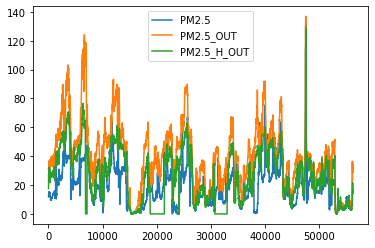

In [111]:
df.plot(kind='line', y=['PM2.5', 'PM2.5_OUT', 'PM2.5_H_OUT'])

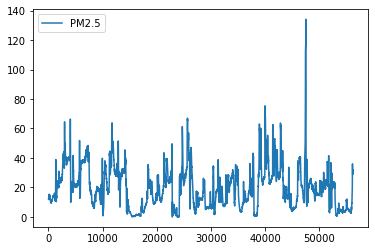

In [112]:
df.plot(kind='line', y=['PM2.5'])

In [113]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PM1,56125.0,12.646859,8.745218,0.00,5.846,1.167200e+01,17.928,90.600
PM2.5,56125.0,19.787762,13.726789,0.00,8.912,1.821600e+01,27.998,134.132
PM10,56125.0,21.899978,16.075675,0.00,9.554,1.950800e+01,30.198,142.154
PM1_H_OUT,56125.0,15.840190,11.294165,0.00,5.590,1.599000e+01,24.660,84.170
PM2.5_H_OUT,56125.0,26.128330,18.283780,0.00,9.520,2.630000e+01,40.280,129.070
PM10_H_OUT,56125.0,30.659977,22.564686,0.00,10.350,2.836000e+01,48.730,136.200
PM1_OUT,56125.0,24.170485,12.810035,0.00,15.490,2.406000e+01,31.980,90.720
PM2.5_OUT,56125.0,39.715129,22.453566,0.02,24.450,3.852000e+01,51.590,136.940
PM10_OUT,56125.0,46.732517,26.232359,0.11,26.410,4.677000e+01,65.300,143.890
PERSON_NUMBER,56125.0,1.047296,1.377722,0.00,0.000,1.776357e-16,2.000,6.000


In [114]:
cols = ['PM1_H_OUT', 'PM2.5_H_OUT', 'PM10_H_OUT', 'PM1_OUT', 'PM2.5_OUT', 'PM10_OUT']
for col in cols:
    df[col] = (df[col] - df[col].mean()) / df[col].std()

In [115]:
df

,PM1,PM2.5,PM10,PM1_H_OUT,PM2.5_H_OUT,PM10_H_OUT,PM1_OUT,PM2.5_OUT,PM10_OUT,PERSON_NUMBER,AIR_PURIFIER,WINDOW
18,7.814,11.878,12.682,-0.424130,-0.468630,-0.531360,-0.229545,-0.377006,-0.468220,0.00,0.0,0.0
19,7.870,11.948,12.762,-0.324963,-0.375105,-0.452476,-0.222520,-0.371216,-0.458690,0.00,0.0,0.0
20,7.956,12.044,12.874,-0.239964,-0.295252,-0.386887,-0.219397,-0.366317,-0.449541,0.00,0.0,0.0
21,8.032,12.120,12.972,-0.163818,-0.225245,-0.330604,-0.221739,-0.364536,-0.443442,0.00,0.0,0.0
22,8.106,12.208,13.076,-0.093871,-0.162895,-0.277867,-0.224081,-0.363645,-0.438486,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
56181,20.574,30.790,33.756,-0.518869,-0.551217,-0.590745,-0.380989,-0.417534,-0.531501,3.93,0.0,1.0
56182,20.474,30.628,33.598,-0.503817,-0.539184,-0.575234,-0.391918,-0.423769,-0.537600,3.91,0.0,1.0
56183,20.378,30.514,33.474,-0.490536,-0.530434,-0.561496,-0.398163,-0.430004,-0.543699,3.90,0.0,1.0
56184,20.282,30.442,33.390,-0.479025,-0.521683,-0.549973,-0.402066,-0.434903,-0.549799,3.90,0.0,1.0


In [11]:
y_df = df['PM2.5']
x_df = df[['PM1_H_OUT', 'PM2.5_H_OUT', 'PM10_H_OUT', 'PM1_OUT', 'PM2.5_OUT', 'PM10_OUT', 'PERSON_NUMBER', 'AIR_PURIFIER', 'WINDOW']]

In [12]:
size = x_df.shape[0]
X_train = x_df.loc[:size * 3 // 5].reset_index(drop='index')
X_val = x_df.loc[size * 3 // 5: size * 3 // 4].reset_index(drop='index')
X_test = x_df.loc[size * 3 // 4:].reset_index(drop='index')
y_train = y_df.loc[:size * 3 // 5].reset_index(drop='index')
y_val = y_df.loc[size * 3 // 5: size * 3 // 4].reset_index(drop='index')
y_test = y_df.loc[size * 3 // 4:].reset_index(drop='index')

In [21]:
from tensorflow.keras.utils import Sequence
import sklearn

class ParticleDS(Sequence):
    def __init__(self, X, y, window_size=12, batch_size=32, shuffle=False, pre_func=None):
        self.X = X
        self.y = y
        self.window_size = window_size
        self.batch_size = batch_size
        self.pre_func = pre_func
        self.shuffle = shuffle
        if self.shuffle:
            self.on_epoch_end()

    def __len__(self):
        return int(np.ceil((len(self.y) - self.window_size) / self.batch_size)) - 1

    def __getitem__(self, index):
        indices = slice(index * self.batch_size, index * self.batch_size + self.window_size)

        X_batch = np.zeros((self.batch_size, self.window_size, self.X.shape[1]), dtype='float32')
        y_batch = np.zeros((self.batch_size, 1), dtype='float32')

        for batch_index in range(self.batch_size):
            X_batch[batch_index] = self.X.shift(-batch_index)[indices]
            y_batch[batch_index] = self.y.shift(-batch_index)[index * self.batch_size + self.window_size]

        return X_batch, y_batch

    def on_epoch_end(self):
        if self.shuffle:
            self.X, self.y = sklearn.utils.shuffle(self.X, self.y)
        else:
            pass

In [22]:
train_ds = ParticleDS(X_train, y_train, window_size=12, batch_size=32, shuffle=False, pre_func=None)
val_ds = ParticleDS(X_val, y_val, window_size=12, batch_size=32, shuffle=False, pre_func=None)
test_ds = ParticleDS(X_test, y_test, window_size=12, batch_size=32, shuffle=False, pre_func=None)

In [119]:
train_ds[1053][0].shape

ValueError: could not broadcast input array from shape (10,9) into shape (12,9)

In [63]:
from tensorflow.keras.layers import Input, Dense, Conv1D, Dropout, MaxPooling1D, GlobalAveragePooling2D, LSTM

def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:-1], y_pred[:-1])

def create_lstm_model(input_shape=(12, 9), name='lstm'):
    input_tensor = Input(shape=input_shape, name='input')
    x =  Conv1D(filters=32, kernel_size=4, strides=2, padding='valid', name='conv1d')(input_tensor)
    x = LSTM(units=12, return_sequences=True, name='lstm_1')(x)
    x = Dropout(0.4)(x)
    x = LSTM(units=16, return_sequences=True, name='lstm_2')(x)
    x = Dropout(0.2)(x)
    x = LSTM(units=16, return_sequences=False, name='lstm_3')(x)
    x = Dense(32, name='fc_1')(x)
    output = Dense(1, name='output')(x)

    return Model(inputs=input_tensor, outputs=output, name=name)

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:-1], y_pred[:-1])

model = create_lstm_model()

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[last_time_step_mse])

2022-04-26 10:09:59.469639: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-26 10:09:59.471956: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [39]:
model.summary()

Model: "lstm"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 12, 9)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 5, 32)             1184      
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 12)             2160      
_________________________________________________________________
dropout (Dropout)            (None, 5, 12)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 16)             1856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 16)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                2112   

In [19]:
model.load_weights('../model_weights/lstm_model_1_weights.hdf5')

In [23]:
model.evaluate(test_ds, batch_size=32)

438/438 [==============================] - 3s 8ms/step - loss: 160.5365 - last_time_step_mse: 160.8657


[160.5364532470703, 160.8656768798828]

In [25]:
result = pd.read_csv('../../datasets/results/lstm_model_1.csv')

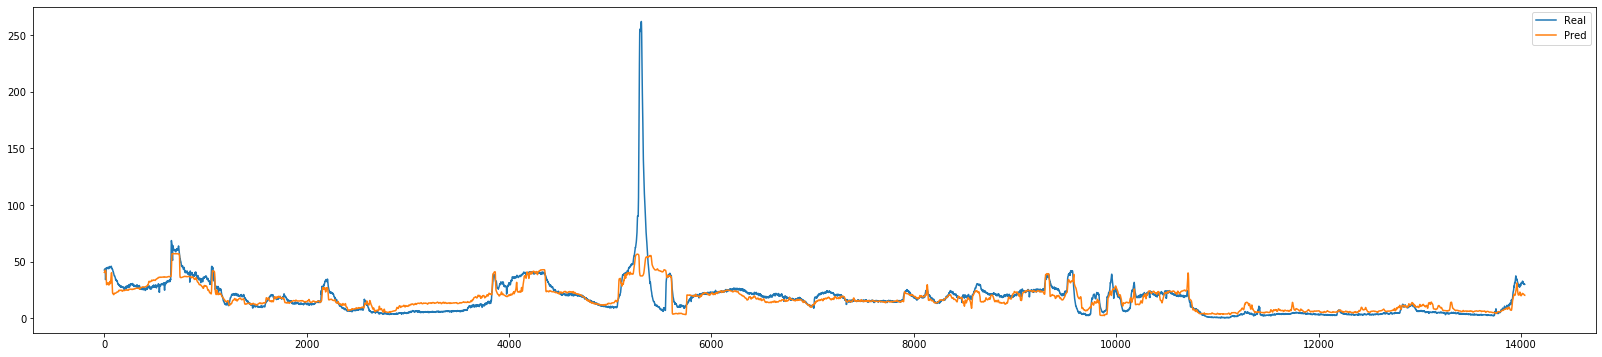

In [62]:
result.plot(kind='line', figsize=(28, 6))

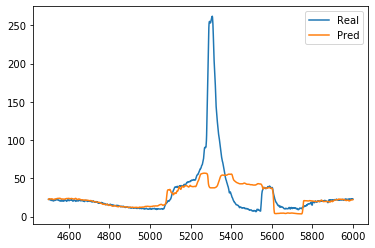

In [40]:
result.loc[4500:6000].plot(kind='line')

In [56]:
result_100 = result[result['Real'] < 100]

In [57]:
from sklearn.metrics import r2_score

r2_score(result_100['Real'].values, result_100['Pred'].values)

0.7442091572351858

In [61]:
df[df['PM2.5'] > 150]

,PM1,PM2.5,PM10,PM1_H_OUT,PM2.5_H_OUT,PM10_H_OUT,PM1_OUT,PM2.5_OUT,PM10_OUT,PERSON_NUMBER,AIR_PURIFIER,WINDOW
47431,104.04,155.20,165.40,38.8,60.4,72.6,130.0,198.2,207.8,3.0,0.0,1.0
47432,112.36,167.36,178.88,41.2,63.8,75.8,134.6,205.6,216.4,3.0,0.0,1.0
47433,119.52,178.88,190.52,45.2,69.8,80.0,139.4,214.2,226.6,3.0,0.0,1.0
47434,129.44,194.48,206.92,48.6,74.0,82.4,150.0,228.8,241.2,3.0,0.0,1.0
47435,138.80,209.04,221.44,50.8,76.6,83.6,157.4,241.4,254.6,3.0,0.0,1.0
47436,148.08,224.12,237.20,53.6,81.0,86.4,162.8,250.0,265.2,3.0,0.0,1.0
47437,155.92,237.48,251.16,55.6,83.0,87.0,165.6,254.4,269.2,3.0,0.0,1.0
47438,162.00,246.84,261.48,58.2,88.2,92.6,169.2,259.4,272.6,3.0,0.0,1.0
47439,165.48,252.16,266.84,59.0,90.6,94.8,166.8,257.4,270.2,3.0,0.0,1.0
47440,167.48,254.44,269.76,61.8,95.4,100.0,163.8,252.0,264.6,3.0,0.0,1.0


In [65]:
def create_lstm_model_v2(input_shape=(12, 9), name='lstm'):
    input_tensor = Input(shape=input_shape, name='input')
    x =  Conv1D(filters=32, kernel_size=4, strides=1, padding='same', name='conv1d_1')(input_tensor)
    x =  Conv1D(filters=64, kernel_size=4, strides=1, padding='same', name='conv1d_2')(x)
    x = MaxPooling1D(pool_size=4, strides=1, padding='same', name='pooling_1')(x)

    x = LSTM(units=12, return_sequences=True, name='lstm_1')(x)
    x = Dropout(0.4)(x)
    x = LSTM(units=32, return_sequences=True, name='lstm_2')(x)
    x = Dropout(0.2)(x)
    x = LSTM(units=16, return_sequences=False, name='lstm_3')(x)
    x = Dense(32, activation='relu', name='fc_1')(x)
    output = Dense(1, name='output')(x)

    return Model(inputs=input_tensor, outputs=output, name=name)

In [66]:
model_2 = create_lstm_model_v2()
model_2.load_weights('../model_weights/lstm_v2_weights.hdf5')

In [82]:
pred = model_2.predict(test_ds, batch_size=32)

In [95]:
result_2 = pd.DataFrame({'Real': y_test[34:].values, 'Pred': pred.reshape(pred.shape[0])})

In [96]:
result_2_100 = result_2[result_2['Real'] < 100]

r2_score(result_2_100['Real'].values, result_2_100['Pred'].values)

0.6826251404320605

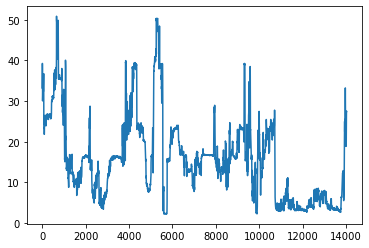

In [83]:
plt.plot(pred)

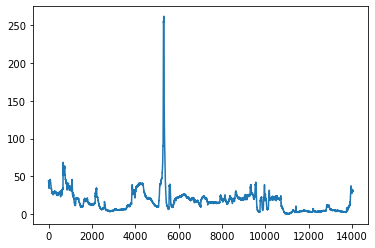